# Regularization

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets

In [3]:
dataobj = datasets.load_wine()

In [6]:
X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
y = dataobj.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
df = pd.concat([X, pd.DataFrame(y, columns=['target'])], axis=1)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


# Spliting data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [13]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (124, 13)
X_test.shape = (54, 13)


# Standardized data

In [15]:
scl = StandardScaler()
scl.fit(X_train)

StandardScaler()

In [16]:
X_train_t = scl.transform(X_train)
X_test_t = scl.transform(X_test)

# Understand sparsity

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1', C=.1)
lr.fit(X_train_t, y_train)
print(f'Train Accuracy : {lr.score(X_train_t, y_train): .4f}')
print(f'Test  Accuracy : {lr.score(X_test_t, y_test): .4f}')

Train Accuracy :  0.9839
Test  Accuracy :  1.0000


In [25]:
## coef_ of multiclass model
lr.coef_

array([[ 0.26709689,  0.        ,  0.        , -0.19506362,  0.        ,
         0.        ,  0.68707725,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.30416181],
       [-0.89988997,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.8473242 ,
         0.        ,  0.        , -0.43522352],
       [ 0.        ,  0.10328787,  0.        ,  0.        ,  0.        ,
         0.        , -0.73640517,  0.        ,  0.        ,  0.59830619,
        -0.31625361, -0.35335497,  0.        ]])

In [30]:
for model, coef in enumerate(lr.coef_):
    p_coef = ', '.join(f'{i:5.2f}' for i in coef)
    print(f'model = {model} : {p_coef}')

model = 0 :  0.27,  0.00,  0.00, -0.20,  0.00,  0.00,  0.69,  0.00,  0.00,  0.00,  0.00,  0.00,  1.30
model = 1 : -0.90,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00, -0.85,  0.00,  0.00, -0.44
model = 2 :  0.00,  0.10,  0.00,  0.00,  0.00,  0.00, -0.74,  0.00,  0.00,  0.60, -0.32, -0.35,  0.00


In [54]:
cols = list(X.columns)
cols.insert(0, 'C')
dfw = pd.DataFrame(columns = cols)
dfw.set_index('C', inplace = True)

dfw.shape

(0, 13)

In [57]:
for e in np.arange(-5., 6.):
    C = 10 ** e
    lr = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1', C=C)
    lr.fit(X_train_t, y_train)
    coef_norm = np.linalg.norm(lr.coef_, ord=1, axis=0)
    dfw.loc[C] = coef_norm
    #print(coef_norm.shape)


In [58]:
dfw

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
C,,,,,,,,,,,,,
0.00001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.10000,1.167211,0.103136,0.000000,0.195049,0.000000,0.000000,1.424364,0.000000,0.000000,1.445984,0.316132,0.352449,1.739251
1.00000,3.101399,0.605201,1.614901,2.045405,0.281335,0.000000,4.147324,0.131584,0.247757,3.077074,1.946485,1.098307,4.447188
10.00000,6.708204,1.464319,5.692678,5.136954,0.444938,1.116270,9.054200,1.665649,1.185698,6.161810,3.800196,2.788546,8.466695
100.00000,10.973069,2.760384,9.993768,8.823024,0.964616,4.075162,14.149406,2.853809,2.597233,9.266586,6.862177,5.099452,13.419725
1000.00000,14.713620,4.112267,14.571554,12.379080,1.818514,6.192619,17.987841,3.635235,4.714177,12.817543,10.746974,7.205145,18.547319


In [39]:
np.arange(-.5, .6)

array([-0.5,  0.5])

In [44]:
for c in np.arange(-5., 6.):
    print(c)

-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
4.0
5.0


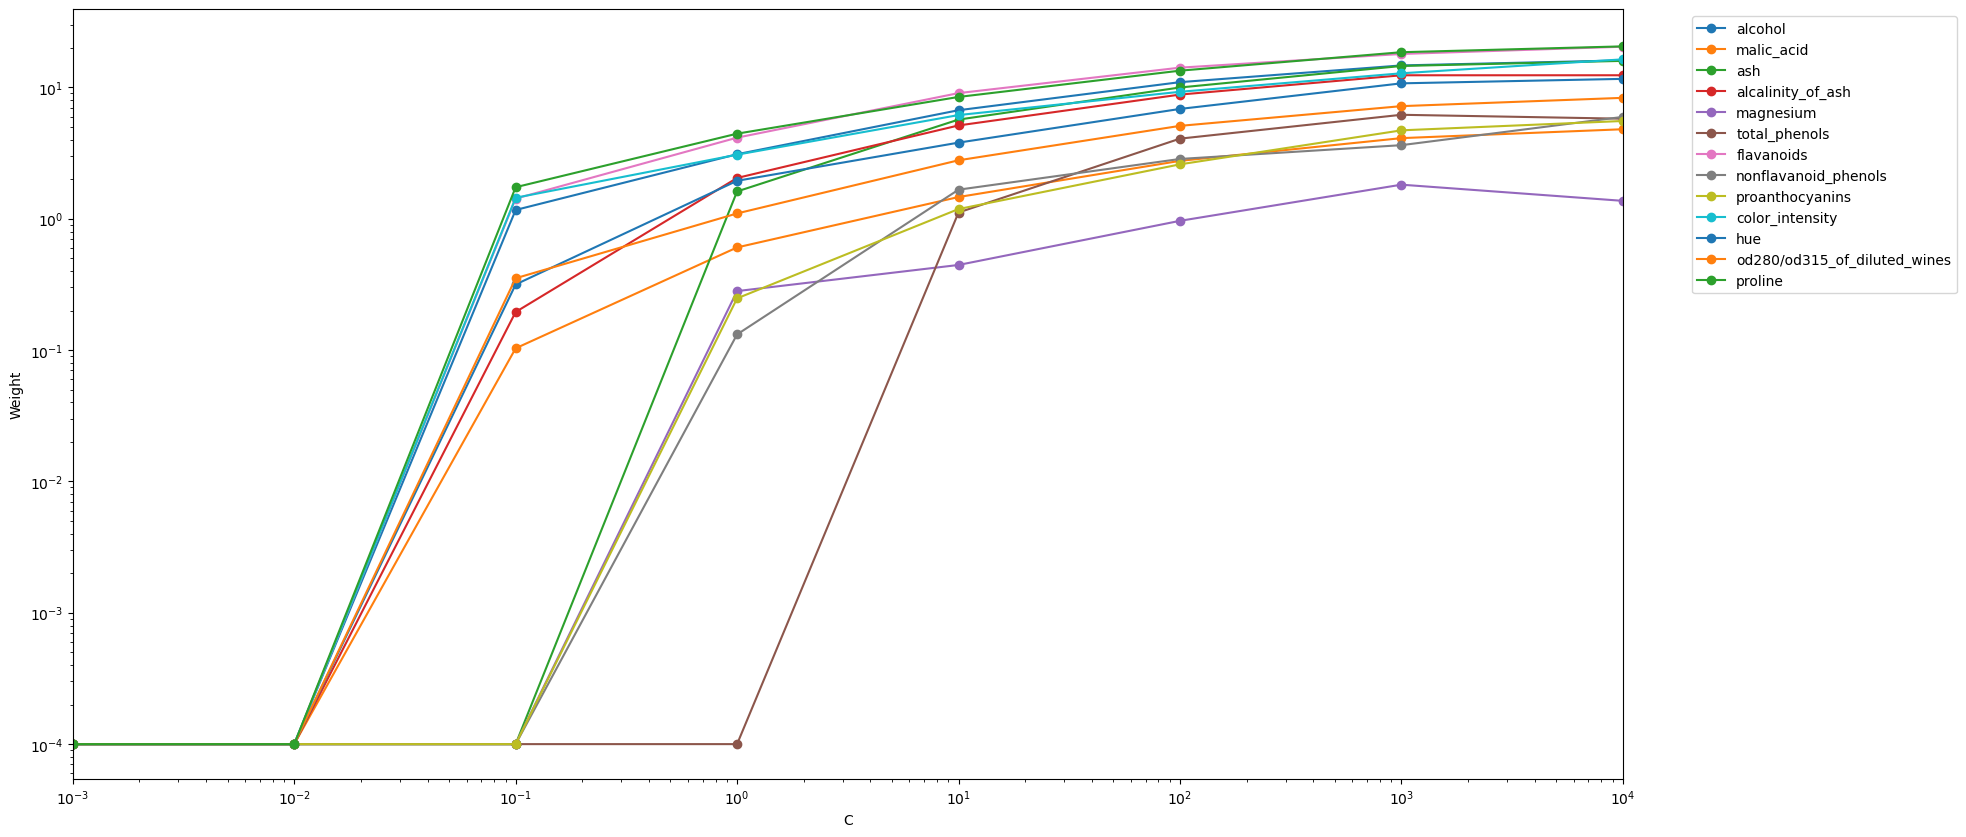

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figre_format = 'retina'
%matplotlib inline

column = dfw.columns.values
color = sns.color_palette(n_colors=len(cols))

eps = 1e-4

fig, ax = plt.subplots(figsize=(20, 10))
for col, color in zip(column, color):
    ax.plot(dfw[col] + eps, label = col, color = color, marker='o')

ax.legend(loc='upper left', bbox_to_anchor=(1.04, 1))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((10 ** -3, 10 ** 4))
ax.set_xlabel('C')
ax.set_ylabel('Weight');

In [64]:
len(cols)

14

In [81]:
dfw.iloc[10, :]

alcohol                         14.675240
malic_acid                       5.371486
ash                             15.790294
alcalinity_of_ash               12.392340
magnesium                        1.563673
total_phenols                    5.614374
flavanoids                      18.162144
nonflavanoid_phenols             5.566575
proanthocyanins                  6.396023
color_intensity                 17.624113
hue                             12.410592
od280/od315_of_diluted_wines     8.074960
proline                         21.375098
Name: 100000.0, dtype: float64

# SLK implementation

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [123]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1', C=.1)
slm = SelectFromModel(estimator=lr, norm_order=1, threshold=.5)

In [124]:
slm.fit(X_train_t, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, multi_class='ovr',
                                             penalty='l1', solver='liblinear'),
                threshold=0.5)

In [125]:
slm.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [126]:
## left feature
X.columns[slm.get_support()].values

array(['alcohol', 'flavanoids', 'color_intensity', 'proline'],
      dtype=object)

In [127]:
X_train_s = pd.DataFrame(slm.transform(X_train_t), columns = X.columns[slm.get_support()].values )
X_train_s

,alcohol,flavanoids,color_intensity,proline
0,1.757250,1.436306,1.176336,2.317381
1,-0.226919,-0.768681,-0.704368,-1.155304
2,0.269123,-1.378990,1.219079,-0.048934
3,-0.288925,-0.266653,-0.747111,-0.791737
4,0.256722,1.190214,0.270179,1.392794
...,...,...,...,...
119,-1.132197,-0.276497,-1.046314,-0.503392
120,0.665957,-0.187903,-0.559041,-0.841884
121,0.145112,0.599592,-0.576138,0.875653
122,-1.653041,0.225532,-0.768483,-1.239927


In [128]:
## coef
coef = slm.estimator_.coef_
coef_norm = np.linalg.norm(coef, axis = 0, ord =1)
sort_w = pd.DataFrame(
    {
        'feature' : X.columns.values,
        'Weight' : coef_norm
    }
)

sort_w.set_index('feature', inplace = True)
sort_w.sort_values(by='Weight', ascending=False)

,Weight
feature,
proline,1.739202
color_intensity,1.445855
flavanoids,1.423977
alcohol,1.166738
od280/od315_of_diluted_wines,0.352930
hue,0.316251
alcalinity_of_ash,0.195000
malic_acid,0.103216
ash,0.000000
